In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
white_wine = pd.read_csv('./data/winequality-white.csv', na_values='na', sep = ';')

In [3]:
train_features, test_features = train_test_split(white_wine, test_size = 0.1, random_state = 1)

In [4]:
train_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4802,5.8,0.28,0.34,2.2,0.037,24.0,125.0,0.98986,3.36,0.33,12.8,8
3319,5.1,0.21,0.28,1.4,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,5
846,6.6,0.22,0.37,15.4,0.035,62.0,153.0,0.99845,3.02,0.40,9.3,5
3143,5.5,0.19,0.27,0.9,0.040,52.0,103.0,0.99026,3.50,0.39,11.2,5
1094,7.4,0.24,0.31,8.4,0.045,52.0,183.0,0.99630,3.09,0.32,8.8,5


In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)
for train_idx, test_idx in split.split(white_wine, white_wine['quality']):
    strat_train_set = white_wine.loc[train_idx]
    strat_test_set = white_wine.loc[test_idx]

In [11]:
strat_train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1372,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.99800,2.87,0.68,9.5,6
3680,6.8,0.15,0.41,12.9,0.044,79.5,183.0,0.99742,3.24,0.78,10.2,6
3609,7.0,0.16,0.25,14.3,0.044,27.0,149.0,0.99800,2.91,0.46,9.2,6
2850,6.7,0.24,0.29,14.9,0.053,55.0,136.0,0.99839,3.03,0.52,9.0,5
637,7.4,0.28,0.25,11.9,0.053,25.0,148.0,0.99760,3.10,0.62,9.2,5


In [37]:
strat_train_set.quality.unique()

array([6, 5, 7, 4, 8, 3, 9], dtype=int64)

In [12]:
strat_test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
248,5.6,0.19,0.26,1.40,0.030,12.0,76.0,0.99050,3.25,0.37,10.9,7
1820,6.8,0.30,0.35,2.80,0.038,10.0,164.0,0.99120,3.09,0.53,12.0,6
2885,6.9,0.40,0.30,10.60,0.033,24.0,87.0,0.99265,3.15,0.45,12.8,6
2081,7.5,0.42,0.14,10.70,0.046,18.0,95.0,0.99590,3.22,0.33,10.7,5
3336,6.9,0.38,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.5,6


In [38]:
strat_test_set.quality.unique()

array([7, 6, 5, 4, 8, 3, 9], dtype=int64)

In [74]:
strat_train_set.shape

(3428, 12)

In [65]:
# strat_train_set.to_csv("white_wine_stratified_train.csv", index = False)

In [66]:
# strat_test_set.to_csv("white_wine_stratified_test.csv", index = False)

In [15]:
dt = DecisionTreeClassifier(max_depth=4)

In [16]:
dt.fit(strat_train_set.drop('quality', axis=1), strat_train_set['quality'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
import pydotplus # install GraphViz first, and then install pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=strat_train_set.columns[1:],
                          class_names=str(pd.unique(strat_train_set['quality'])), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [25]:
Image(graph.create_png("jpeg"))

InvocationException: GraphViz's executables not found

In [67]:
dtPred = dt.predict(strat_test_set.drop('quality', 1))

In [27]:
pd.unique(strat_train_set['quality'])

array([6, 5, 7, 4, 8, 3, 9], dtype=int64)

In [28]:
pd.unique(strat_test_set['quality'])

array([7, 6, 5, 4, 8, 3, 9], dtype=int64)

In [44]:
strat_test_set['quality'].value_counts()

6    660
5    437
7    264
8     53
4     49
3      6
9      1
Name: quality, dtype: int64

In [68]:
sum(dtPred == strat_test_set['quality'])

793

In [69]:
sum(dtPred != strat_test_set['quality'])

677

In [70]:
dt_cm = confusion_matrix(strat_test_set['quality'], dtPred, labels=[3,4,5,6,7,8,9])

In [71]:
dt_cm

array([[  0,   0,   2,   4,   0,   0,   0],
       [  0,   1,  32,  15,   1,   0,   0],
       [  0,   5, 251, 179,   2,   0,   0],
       [  0,   4, 140, 483,  33,   0,   0],
       [  0,   0,   8, 198,  58,   0,   0],
       [  0,   0,   0,  34,  19,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

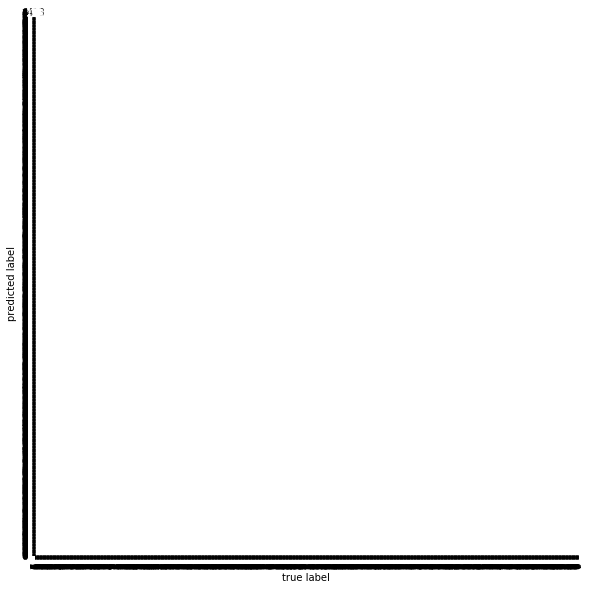

In [73]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(dt_cm , square=True, annot=True, fmt='d', cbar=False,
            xticklabels=strat_test_set["quality"],
            yticklabels=dtPred)
plt.xlabel('true label')
plt.ylabel('predicted label');